In [ ]:
from google.colab import drive
drive.mount('/content/drive')


dataset_path = "/content/drive/MyDrive/Dataset 4 Jenis"

!ls "$dataset_path"


Mounted at /content/drive
Test  Train


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

IMG_SIZE = (224, 224)    # resolusi gamnbar untuk nanti
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Dataset 4 Jenis/Train"
val_dir   = "/content/drive/MyDrive/Dataset 4 Jenis/Test"

train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Kelas:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)


Found 320 files belonging to 4 classes.
Found 80 files belonging to 4 classes.
Kelas: ['Bus', 'Car', 'Truck', 'motorcycle']


In [ ]:

base_model = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

base_model.trainable = False


inputs = keras.Input(shape=IMG_SIZE + (3,))
x = keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  6,422,784 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │      1,028 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.3944 - loss: 17.9409 - val_accuracy: 0.8250 - val_loss: 2.2289
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 729ms/step - accuracy: 0.8685 - loss: 2.9601 - val_accuracy: 0.8875 - val_loss: 1.9228
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 930ms/step - accuracy: 0.9754 - loss: 0.3174 - val_accuracy: 0.8875 - val_loss: 1.5208
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 605ms/step - accuracy: 0.9800 - loss: 0.2382 - val_accuracy: 0.9000 - val_loss: 1.3116
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 762ms/step - accuracy: 0.9694 - loss: 0.5071 - val_accuracy: 0.8750 - val_loss: 1.3319


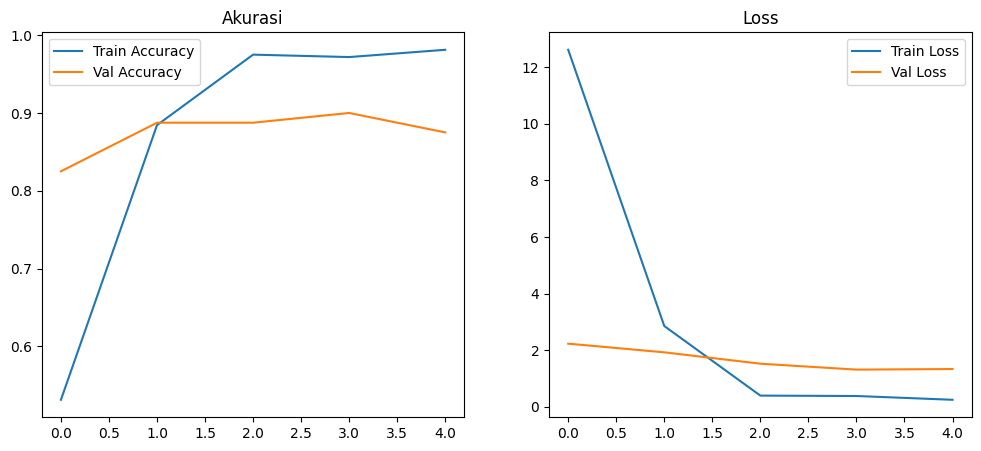

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Akurasi")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


Saving vespa.jpg to vespa.jpg
✅ Gambar berhasil diupload: vespa.jpg


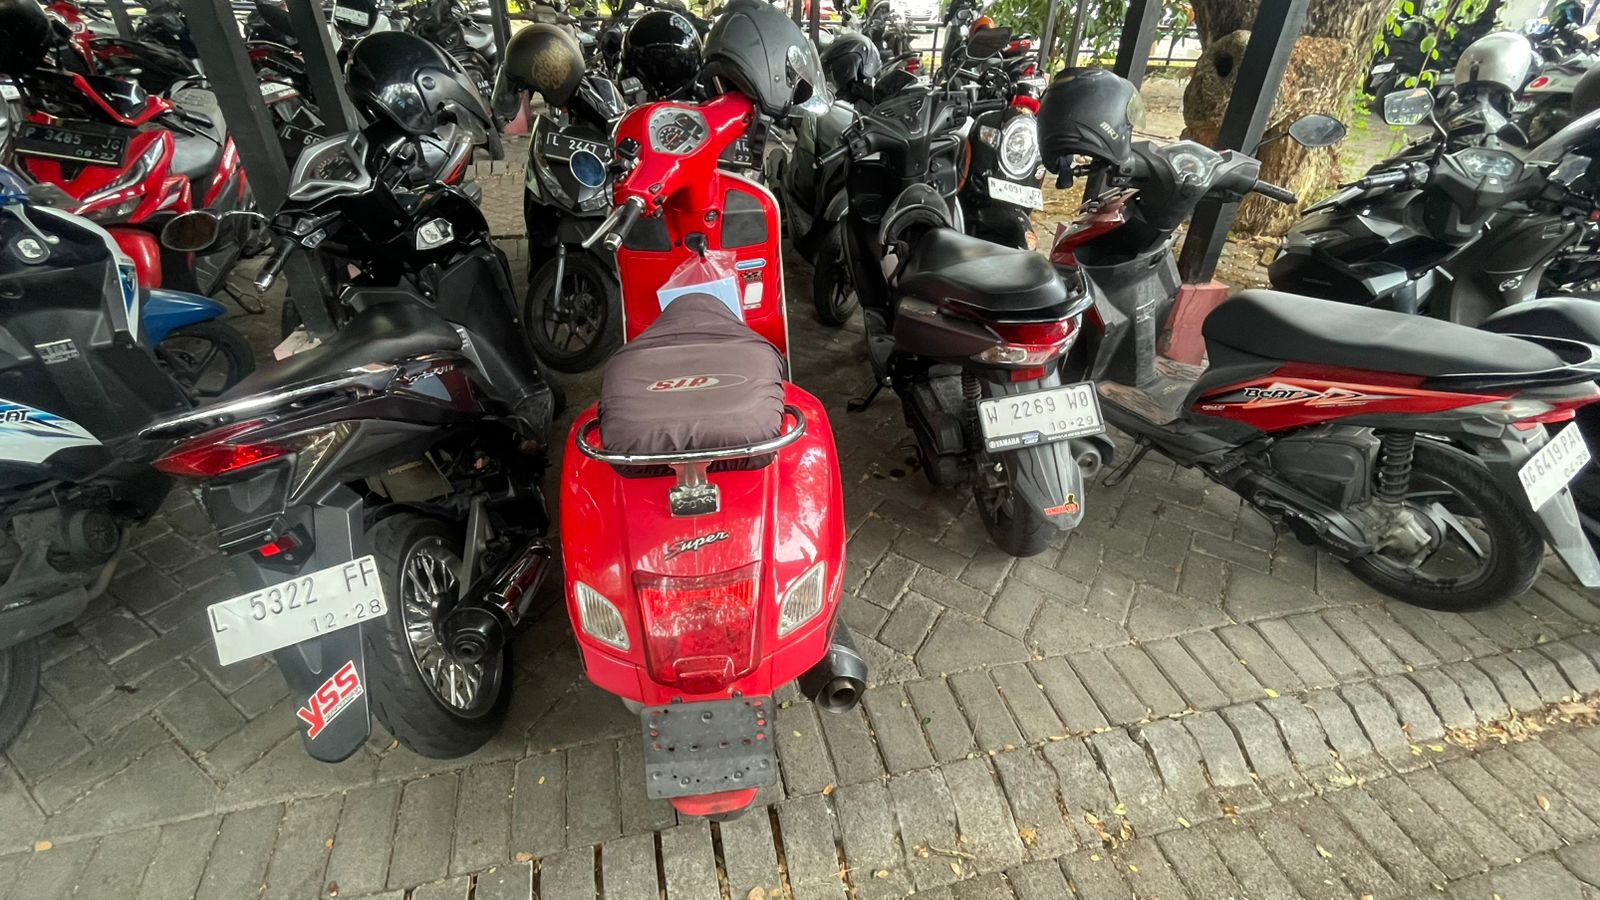

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Probabilitas tiap kelas: [0.000000e+00 0.000000e+00 5.341798e-18 1.000000e+00]
 Prediksi: motorcycle (confidence 1.0000)


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

image_path = list(uploaded.keys())[0]
print(f"✅ Gambar berhasil diupload: {image_path}")

img = Image.open(image_path).convert("RGB")
img_resized = img.resize(IMG_SIZE)

display(img)


x = np.array(img_resized)[None, ...]
x = keras.applications.vgg16.preprocess_input(x)

pred = model.predict(x)
pred_class_idx = np.argmax(pred[0])
pred_class_name = class_names[pred_class_idx]
pred_conf = float(np.max(pred[0]))

print("Probabilitas tiap kelas:", pred[0])
print(f" Prediksi: {pred_class_name} (confidence {pred_conf:.4f})")

